#### Importing Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Data Preprocessing

#### Reading & Viewing Data

In [124]:
df = pd.read_excel("sdsp_patients.xlsx", engine='openpyxl')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Disease                 400 non-null    object 
 1   MedicalGender           400 non-null    object 
 2   Age                     400 non-null    float64
 3   SystolicBloodPressure   400 non-null    object 
 4   DiastolicBloodPressure  400 non-null    float64
 5   BloodGlucose            400 non-null    float64
 6   BreathingDifficulties   400 non-null    object 
 7   UnintendedWeightLoss    400 non-null    object 
 8   FrequentUrination       400 non-null    object 
 9   Lathargic               400 non-null    object 
 10  Lathargic.1             400 non-null    object 
 11  LDL>160                 400 non-null    object 
 12  Triglycerides>200       400 non-null    object 
 13  Angina                  400 non-null    object 
 14  FrequentHunger          400 non-null    ob

In [126]:
df.head()

,Disease,MedicalGender,Age,SystolicBloodPressure,DiastolicBloodPressure,BloodGlucose,BreathingDifficulties,UnintendedWeightLoss,FrequentUrination,Lathargic,...,FeNO>27,Feature_42,DoYouSmoke?,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Type-2 Diabetes,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Type-2 Diabetes,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Type-2 Diabetes,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Type-2 Diabetes,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Type-2 Diabetes,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No


#### Fixing some problems on dataset

In [127]:
# Some missing values are indicated as empty strings (' ') in df. We convert them to np.nan like rest of the missing values.
for column_name in df.columns:
    if len(df[column_name][df[column_name] == ' ']) != 0:
        df[column_name].replace(' ', np.nan, inplace=True)

# Also, data type of SystolicBloodPressure is given wrong. It should be float64.
df['SystolicBloodPressure'].astype('float64')

0      130.0
1       95.0
2      152.0
3      112.0
4      105.5
       ...  
395    142.0
396    172.0
397    147.0
398    138.0
399    130.0
Name: SystolicBloodPressure, Length: 400, dtype: float64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Disease                 400 non-null    object 
 1   MedicalGender           400 non-null    object 
 2   Age                     400 non-null    float64
 3   SystolicBloodPressure   398 non-null    float64
 4   DiastolicBloodPressure  400 non-null    float64
 5   BloodGlucose            400 non-null    float64
 6   BreathingDifficulties   400 non-null    object 
 7   UnintendedWeightLoss    400 non-null    object 
 8   FrequentUrination       400 non-null    object 
 9   Lathargic               400 non-null    object 
 10  Lathargic.1             400 non-null    object 
 11  LDL>160                 400 non-null    object 
 12  Triglycerides>200       400 non-null    object 
 13  Angina                  400 non-null    object 
 14  FrequentHunger          400 non-null    ob

#### Splitting Dataset

In [129]:
X = df.drop('Disease', axis=1)
y = df['Disease']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Handling Missing Values

In [131]:
def impute_missing_values(data):
    missing_valued_columns = data.columns[data.isnull().any()].tolist()
    for column_name in missing_valued_columns:
        if data[column_name].dtype == 'O':
            # most frequent value
            imputed_value = data.loc[:,column_name].mode()[0]
        elif data[column_name].dtype == 'float64':
            #mean value
            imputed_value = df[column_name].mean()
        data.loc[:,column_name].fillna(imputed_value, inplace=True)

In [132]:
# train data
impute_missing_values(X_train)

# test data
impute_missing_values(X_test)

#### Class Distribution on Train Data

<AxesSubplot:>

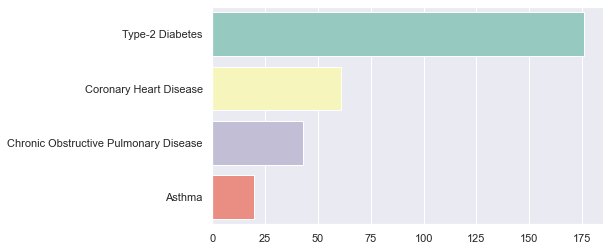

In [133]:
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x = y_train.value_counts().values, y=y_train.value_counts().index, palette="Set3")

#### Class Distribution on Test Data

<AxesSubplot:>

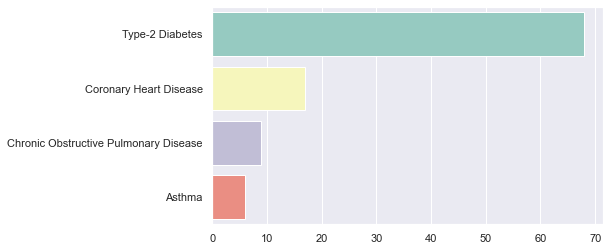

In [134]:
sns.barplot(x = y_test.value_counts().values, y=y_test.value_counts().index, palette="Set3")

#### Encoding Categorical Variables

##### Label Encoding for bi-variable features

In [135]:
column_names = list(X_train.columns)
column_names.remove('AlcoholUse')
column_names.remove('MostStressed')

In [136]:
for column_name in column_names:
    if X_train[column_name].dtype == 'O':
        le = LabelEncoder()
        le.fit(X_train[column_name])
        X_train[column_name] = le.transform(X_train[column_name])
        X_test[column_name] = le.transform(X_test[column_name])

#### One-Hot Encoding for multi-variable features (AlcoholUse, MostStressed)

In [137]:
X_train = pd.get_dummies(X_train)

In [138]:
X_test = pd.get_dummies(X_test)

In [139]:
X_train

,MedicalGender,Age,SystolicBloodPressure,DiastolicBloodPressure,BloodGlucose,BreathingDifficulties,UnintendedWeightLoss,FrequentUrination,Lathargic,Lathargic.1,...,Feature_48,Feature_49,Feature_50,AlcoholUse_1-2 Days a Month,AlcoholUse_1-2 Days a Week,AlcoholUse_3-4 Days a Week,AlcoholUse_Every Day,MostStressed_Evenings,MostStressed_Mornings,MostStressed_No Difference
247,0,15.0,96.0,44.0,24.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
110,0,55.0,161.0,204.0,6.0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
16,1,21.0,120.0,96.0,48.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
66,1,15.0,102.0,60.0,24.0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
153,0,27.0,135.0,120.0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,18.0,111.0,72.0,48.0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
106,1,40.0,152.0,180.0,6.0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
270,0,75.0,175.0,197.0,102.0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
348,0,38.0,147.0,156.0,12.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [140]:
X_test

,MedicalGender,Age,SystolicBloodPressure,DiastolicBloodPressure,BloodGlucose,BreathingDifficulties,UnintendedWeightLoss,FrequentUrination,Lathargic,Lathargic.1,...,Feature_48,Feature_49,Feature_50,AlcoholUse_1-2 Days a Month,AlcoholUse_1-2 Days a Week,AlcoholUse_3-4 Days a Week,AlcoholUse_Every Day,MostStressed_Evenings,MostStressed_Mornings,MostStressed_No Difference
209,1,90.00,163.0,192.0,120.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
280,0,16.50,108.0,54.0,20.0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
33,1,14.00,94.0,48.0,12.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
210,0,17.00,101.0,48.0,12.0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
93,1,40.00,143.0,171.0,3.0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1,15.50,97.0,40.0,34.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
373,0,45.00,156.0,156.0,18.0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
380,1,25.25,115.0,72.0,36.0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
239,0,23.00,111.0,72.0,12.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


#### Data Normalization

In [141]:
scaler_train = MinMaxScaler()
scaler_train.fit(X_train)

MinMaxScaler()

In [142]:
# backup df, since we concatenate the train df and test df at last step.
X_train_backup = X_train.copy()
X_train = pd.DataFrame(scaler_train.transform(X_train), columns=X_train.columns)

In [143]:
scaler_test = MinMaxScaler()
scaler_test.fit(X_test)

MinMaxScaler()

In [144]:
# backup df, since we concatenate the train df and test df at last step.
X_test_backup = X_test.copy()
X_test = pd.DataFrame(scaler_test.transform(X_test), columns=X_test.columns)

In [145]:
X_train

,MedicalGender,Age,SystolicBloodPressure,DiastolicBloodPressure,BloodGlucose,BreathingDifficulties,UnintendedWeightLoss,FrequentUrination,Lathargic,Lathargic.1,...,Feature_48,Feature_49,Feature_50,AlcoholUse_1-2 Days a Month,AlcoholUse_1-2 Days a Week,AlcoholUse_3-4 Days a Week,AlcoholUse_Every Day,MostStressed_Evenings,MostStressed_Mornings,MostStressed_No Difference
0,0.0,0.067568,0.190476,0.159204,0.142551,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.608108,0.809524,0.955224,0.035370,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.148649,0.419048,0.417910,0.285459,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.067568,0.247619,0.238806,0.142551,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.229730,0.561905,0.537313,0.047279,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.108108,0.333333,0.298507,0.285459,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
296,1.0,0.405405,0.723810,0.835821,0.035370,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
297,0.0,0.878378,0.942857,0.920398,0.607003,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
298,0.0,0.378378,0.676190,0.716418,0.071097,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [146]:
X_test

,MedicalGender,Age,SystolicBloodPressure,DiastolicBloodPressure,BloodGlucose,BreathingDifficulties,UnintendedWeightLoss,FrequentUrination,Lathargic,Lathargic.1,...,Feature_48,Feature_49,Feature_50,AlcoholUse_1-2 Days a Month,AlcoholUse_1-2 Days a Week,AlcoholUse_3-4 Days a Week,AlcoholUse_Every Day,MostStressed_Evenings,MostStressed_Mornings,MostStressed_No Difference
0,1.0,1.000000,0.868132,0.931034,0.833183,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.081250,0.263736,0.137931,0.138111,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.050000,0.109890,0.103448,0.082505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.087500,0.186813,0.103448,0.082505,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.375000,0.648352,0.810345,0.019949,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.068750,0.142857,0.057471,0.235421,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
96,0.0,0.437500,0.791209,0.724138,0.124209,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
97,1.0,0.190625,0.340659,0.241379,0.249322,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.0,0.162500,0.296703,0.241379,0.082505,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Target Variables : Label Encoding

In [147]:
le_y_train = LabelEncoder()

In [148]:
le_y_train.fit(y_train)

LabelEncoder()

In [149]:
y_train_le = le_y_train.transform(y_train)

In [150]:
y_test_le = le_y_train.transform(y_test)

### Feature Selection

##### Feature selection by variance

If a feature has zero variance or so small variance, then this feature wouldn't be very useful. We could simply drop these kind of features to reduce dimensionality. (Normalized features provide better understanding for variances.) However, we have to analyze more to be sure that which features we should drop.

In [151]:
print("Variance of Features \n")
print(X_train.var().sort_values())

Variance of Features 

EpigastricPain                 0.000000
AST:ALT>1.5                    0.000000
FattyLiver                     0.000000
Triglycerides>200              0.003333
IncreasedWBC                   0.003333
Feature_21                     0.006644
Feature_18                     0.006644
FrequentHunger                 0.006644
Feature_17                     0.006644
Feature_26                     0.006644
LDL>160                        0.009933
Feature_24                     0.009933
Feature_22                     0.013200
Feature_20                     0.013200
KidneyDisorder                 0.016444
BloodGlucose                   0.019698
Feature_44                     0.024554
Feature_38                     0.026042
Age                            0.033942
SystolicBloodPressure          0.043596
Feature_46                     0.044638
Angina                         0.047659
Lathargic.1                    0.050658
Feature_36                     0.053634
DiastolicBloodPre

We can directly drop the features 'FattyLiver', 'AST:ALT>1.5' and 'EpigastricPain', since their variance is 0. That means they all have only one unique variable and so they are useless. 

We can also consider to drop features, since they are also has so small variance: EpigastricPain, AST:ALT>1.5, FattyLiver, Triglycerides>200, IncreasedWBC, Feature_21, Feature_18, FrequentHunger, Feature_17, Feature_26, LDL>160, Feature_24, Feature_22, Feature_20, KidneyDisorder (The feature names are aligned with respect to their variance value). KidneyDisorder has the highest variance. And 295 samples out of 300 has KidneyDisorder value of 1 and the rest (5) are 0.

So, we just accept the features that has variance of 0.017 or higher:

In [152]:
to_drop_features_variance = list(X_train.var().sort_values()[X_train.var().sort_values() < 0.017].index)

In [153]:
X_train_selected_features = X_train.drop(to_drop_features_variance, axis=1)

In [154]:
X_train_selected_features.columns

Index(['MedicalGender', 'Age', 'SystolicBloodPressure',
       'DiastolicBloodPressure', 'BloodGlucose', 'BreathingDifficulties',
       'UnintendedWeightLoss', 'FrequentUrination', 'Lathargic', 'Lathargic.1',
       'Angina', 'Feature_27', 'Feature_30', 'Feature_31', 'Feature_32',
       'Cholestrol>250', 'Feature_34', 'Feature_35', 'Feature_36', 'HbA1C>6.5',
       'Feature_38', 'SpirometryQualified', 'Feature_40', 'FeNO>27',
       'Feature_42', 'DoYouSmoke?', 'Feature_44', 'Feature_45', 'Feature_46',
       'Feature_47', 'Feature_48', 'Feature_49', 'Feature_50',
       'AlcoholUse_1-2 Days a Month', 'AlcoholUse_1-2 Days a Week',
       'AlcoholUse_3-4 Days a Week', 'AlcoholUse_Every Day',
       'MostStressed_Evenings', 'MostStressed_Mornings',
       'MostStressed_No Difference'],
      dtype='object')

##### Feature selection by highly correlated features

<AxesSubplot:>

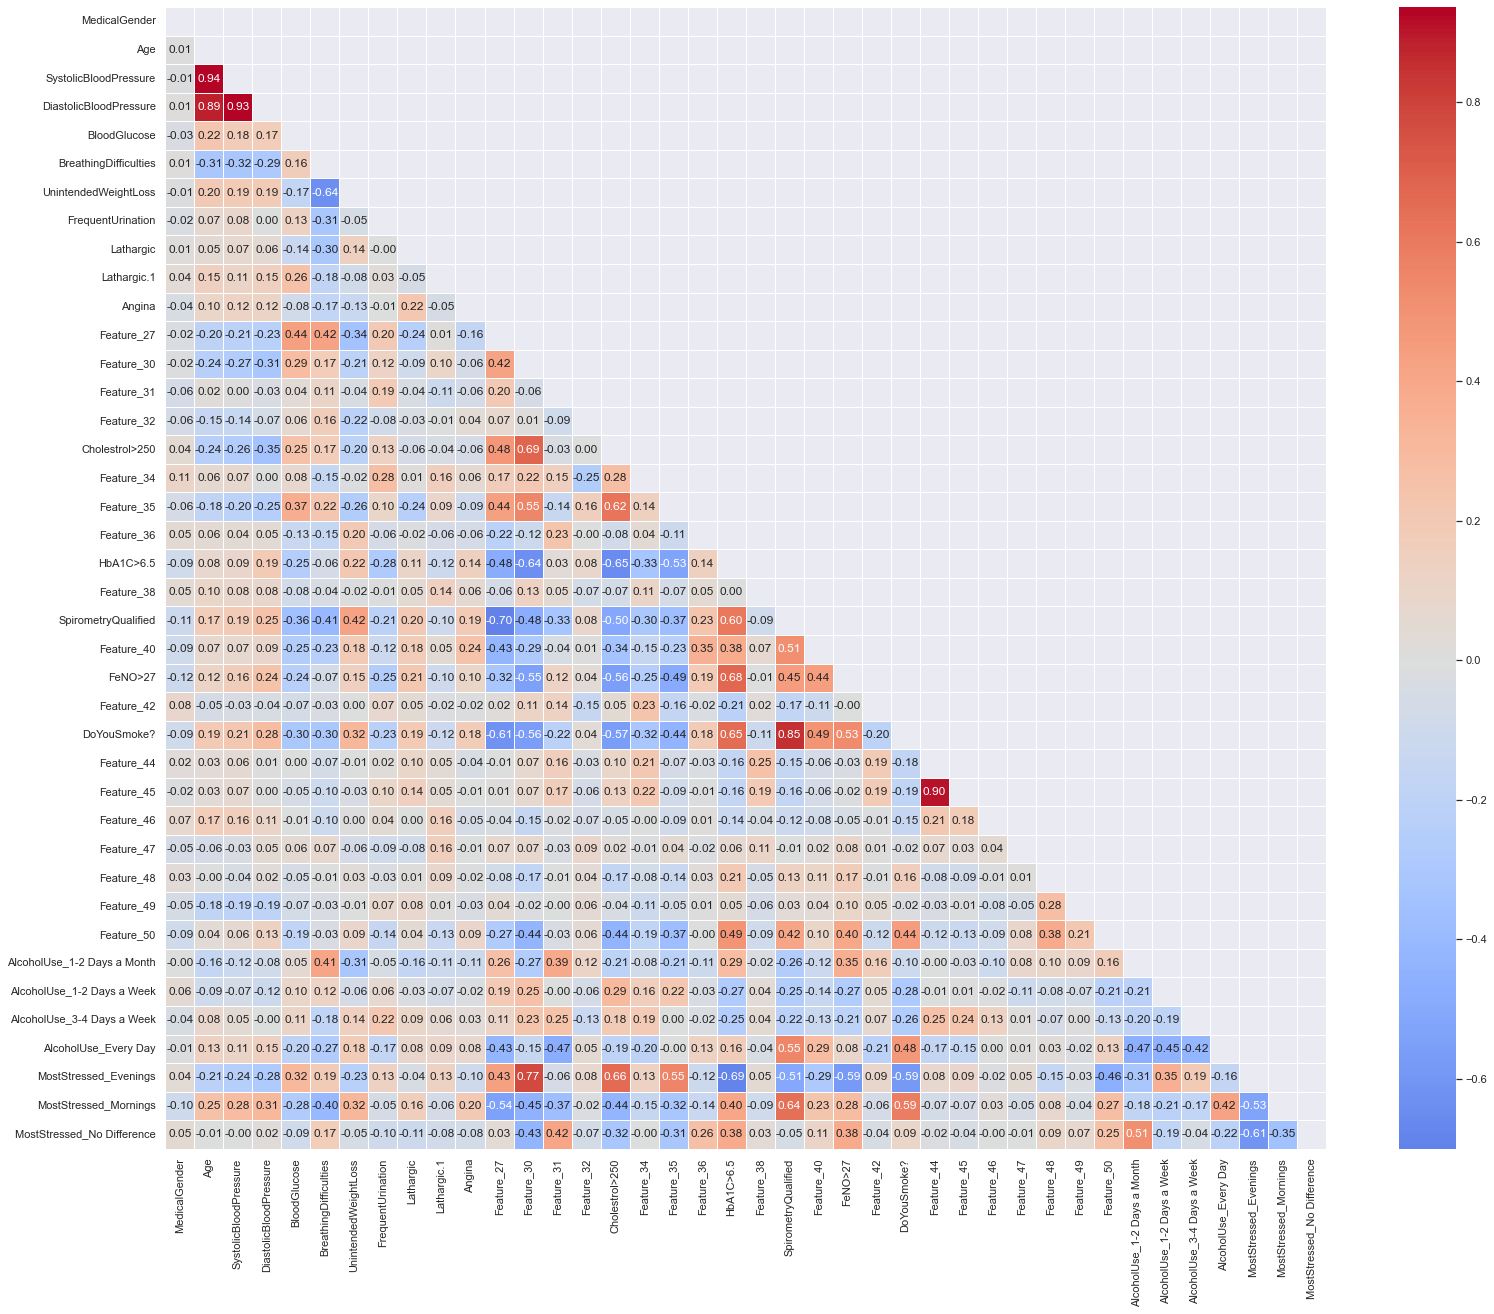

In [155]:
corr = X_train_selected_features.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize':(26,21)})
sns.heatmap(corr, mask=mask, annot=True, center=0, linewidths=1, fmt='.2f', cmap="coolwarm")

From the figure above, we can clearly see highly negative and positive correlated feature pairs. To drop unnecessary features, we first decide a threshold which indicates the minimum correlation score. For each feature, we check if it has any correlation score which exceeds the threshold with other features. If so, we simply drop that feature.

In [156]:
def find_highly_correlated_features(df, threshold):
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    tri_df = corr.mask(mask)

    to_drop = []
    for column in tri_df.columns:
        if any(tri_df[column] > threshold):
            to_drop.append(column)
            print("Feature: ", column, "; Highly Correlated Features: ", list(tri_df[column][tri_df[column] > threshold].index))
    
    return to_drop

In [157]:
to_drop_features_highly_corr = find_highly_correlated_features(X_train_selected_features, threshold=0.92)

Feature:  Age ; Highly Correlated Features:  ['SystolicBloodPressure']
Feature:  SystolicBloodPressure ; Highly Correlated Features:  ['DiastolicBloodPressure']


C:\Users\Dell\AppData\Local\Temp\ipykernel_37096\1875492467.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data= X_train_selected_features, x='Age', y='SystolicBloodPressure', alpha=0.6,  palette= sns.color_palette("hls", 7), legend=False, ax=ax1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_37096\1875492467.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data= X_train_selected_features, x='SystolicBloodPressure', y='DiastolicBloodPressure', alpha=0.6,  palette= sns.color_palette("hls", 7), legend=False, ax=ax2)


<AxesSubplot:xlabel='SystolicBloodPressure', ylabel='DiastolicBloodPressure'>

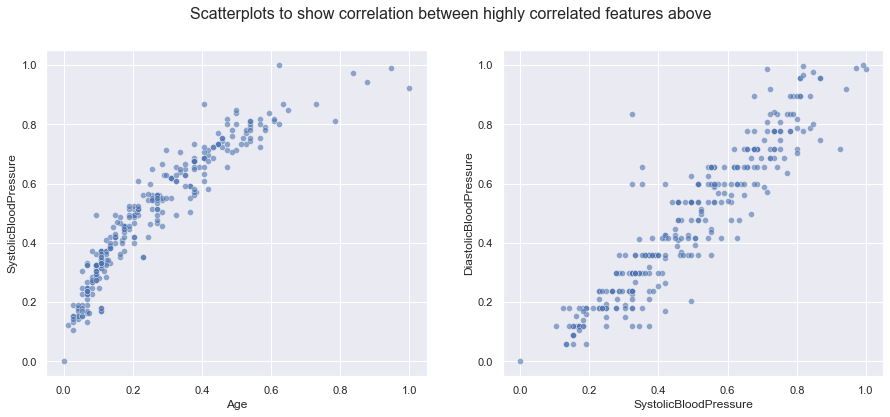

In [158]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Scatterplots to show correlation between highly correlated features above', fontsize=16)
sns.scatterplot(data= X_train_selected_features, x='Age', y='SystolicBloodPressure', alpha=0.6,  palette= sns.color_palette("hls", 7), legend=False, ax=ax1)
sns.scatterplot(data= X_train_selected_features, x='SystolicBloodPressure', y='DiastolicBloodPressure', alpha=0.6,  palette= sns.color_palette("hls", 7), legend=False, ax=ax2)

Age and SystolicBloodPressure have the correlation score of **0.94** and SystolicBloodPressure and DiastolicBloodPressure have the correlation score of **0.93**. We may drop one of the feature from the pairs (e.g. **SystolicBloodPressure** and **DiastolicBloodPressure**). However correlation scores are not so high. So we may need more analysis to be sure.

##### Pragmatic approaches to select features based on feature weights of the model

Each feature has its own weight and model weights which are close to zero will contribute less then other weights to the result. So we can drop the features whose corresponding weight is so small. We will use RFE to iterate that process (training - observing weights and accuracy - dropping features whose weight is close to 0) to get most meaningful features for the model.

In [159]:
def get_important_features_from_model(X, Y, estimator_function, number_of_features_selected):
    rfe = RFE(estimator=estimator_function, n_features_to_select=number_of_features_selected)
    rfe.fit(X, Y)
    mask = rfe.support_

    # return features we should keep
    print(list(X.columns[mask]), '\n')

    #print("Higher rank means the feature was dropped earlier.")
    #for column, rank in zip(X.columns, rfe.ranking_):
    #    print(column, ": ", rank)
    
    return mask

In [160]:
lr_mask = get_important_features_from_model(X_train_selected_features, y_train_le, LogisticRegression(), 10)

['DiastolicBloodPressure', 'Feature_27', 'Feature_32', 'Feature_36', 'HbA1C>6.5', 'SpirometryQualified', 'DoYouSmoke?', 'Feature_50', 'AlcoholUse_1-2 Days a Month', 'AlcoholUse_Every Day'] 



In [161]:
rfc_mask = get_important_features_from_model(X_train_selected_features, y_train_le, RandomForestClassifier(), 10)

['SystolicBloodPressure', 'DiastolicBloodPressure', 'BloodGlucose', 'BreathingDifficulties', 'HbA1C>6.5', 'SpirometryQualified', 'FeNO>27', 'DoYouSmoke?', 'AlcoholUse_1-2 Days a Month', 'MostStressed_No Difference'] 



Our selected features as above. We will now use "majority voted" method with using two classifiers which are logistic regression and random forest classifier to select best features:

In [162]:
votes = np.sum([lr_mask, rfc_mask], axis=0)
print("Top important features according to votes (>=2)")
important_features = list(X_train_selected_features.loc[:, votes >=2].columns)
print(important_features)

Top important features according to votes (>=2)
['DiastolicBloodPressure', 'HbA1C>6.5', 'SpirometryQualified', 'DoYouSmoke?', 'AlcoholUse_1-2 Days a Month']


We run many times to above parts to see the model select which features based on majority voting. Here are the different versions:

In [163]:
final_features_v1 = ['SystolicBloodPressure', 'Cholestrol>250', 'HbA1C>6.5', 'SpirometryQualified', 'FeNO>27', 'DoYouSmoke?', 'AlcoholUse_1-2 Days a Month', 'MostStressed_Mornings']

In [164]:
final_features_v2 = ['SystolicBloodPressure', 'HbA1C>6.5', 'SpirometryQualified', 'FeNO>27', 'DoYouSmoke?', 'AlcoholUse_1-2 Days a Month']

In [165]:
final_features_v3 = ['HbA1C>6.5', 'SpirometryQualified', 'FeNO>27', 'DoYouSmoke?', 'AlcoholUse_1-2 Days a Month']

Since final features are not highly correlated each other, we do not frop any features from them (We concluded from the previous section that we found highly correlated features.)

Final X_train with selected features:

In [166]:
X_train_selected_features_v1 = X_train_selected_features[final_features_v1]
X_train_selected_features_v2 = X_train_selected_features[final_features_v2]
X_train_selected_features_v3 = X_train_selected_features[final_features_v3]

In [167]:
X_test_selected_features_v1 = X_test[final_features_v1]
X_test_selected_features_v2 = X_test[final_features_v2]
X_test_selected_features_v3 = X_test[final_features_v3]

In [168]:
# train-test sets are now in --> X_train_selected_features_v2, X_test_selected_features_v2, y_train_le, y_test_le

In [169]:
X_train_selected_features_v2

,SystolicBloodPressure,HbA1C>6.5,SpirometryQualified,FeNO>27,DoYouSmoke?,AlcoholUse_1-2 Days a Month
0,0.190476,0.0,0.0,0.0,0.0,0.0
1,0.809524,1.0,1.0,1.0,1.0,0.0
2,0.419048,0.0,0.0,0.0,0.0,0.0
3,0.247619,0.0,0.0,0.0,0.0,0.0
4,0.561905,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
295,0.333333,0.0,0.0,0.0,0.0,0.0
296,0.723810,1.0,1.0,1.0,1.0,0.0
297,0.942857,0.0,0.0,0.0,0.0,0.0
298,0.676190,1.0,0.0,1.0,0.0,1.0


In [170]:
X_test_selected_features_v2

,SystolicBloodPressure,HbA1C>6.5,SpirometryQualified,FeNO>27,DoYouSmoke?,AlcoholUse_1-2 Days a Month
0,0.868132,0.0,0.0,1.0,0.0,0.0
1,0.263736,0.0,0.0,1.0,0.0,0.0
2,0.109890,0.0,0.0,0.0,0.0,0.0
3,0.186813,0.0,0.0,0.0,0.0,0.0
4,0.648352,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
95,0.142857,0.0,0.0,1.0,1.0,1.0
96,0.791209,0.0,0.0,1.0,0.0,0.0
97,0.340659,0.0,0.0,0.0,0.0,1.0
98,0.296703,0.0,0.0,0.0,0.0,0.0


In [171]:
y_train_le

array([3, 2, 3, 3, 2, 3, 3, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 1, 3, 0, 1, 1, 2, 3, 3, 2, 3, 0, 2, 0, 3, 3, 3, 3, 3, 2, 3, 2,
       1, 3, 3, 2, 2, 3, 3, 1, 1, 2, 3, 0, 2, 3, 1, 3, 3, 3, 3, 2, 1, 3,
       3, 2, 2, 3, 3, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 1, 3,
       1, 0, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 0, 2, 3, 3, 3, 2, 3, 3, 1, 0,
       3, 2, 0, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 3, 0, 3,
       3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 2, 1, 3, 3, 1, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 1, 3, 3, 1, 2, 3, 1, 3, 0, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 0,
       0, 3, 0, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 0, 3, 1, 3, 3, 2, 2, 2, 3,
       2, 3, 3, 1, 3, 2, 3, 3, 0, 3, 2, 3, 1, 2])

In [172]:
y_test_le

array([3, 3, 3, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 3, 2, 2, 1, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 0, 3, 0, 3, 1, 1, 3, 3, 3, 3, 0, 3, 2, 2, 2, 3, 3, 2, 3,
       1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 1, 2, 3, 0, 1, 3, 3, 3, 3])

#### t-SNE Visualization

We can use t-SNE to observe patterns in the data. t-SNE convert n-d feature space that data have into 2-d feature space. It maximize the distance in 2-d space between observations that are most different in a n-d space. After finding our best features, our model may differentiate three classes easily (Disease1, Disease2 and others-3,4), since within class variation decresed and between class variation increased. (Disease 3 and 4 overlap each other. The reason why may be we have already less data for all diseases. However disease 3 and 4 have very few samples according to Disease 1 and 2. And model may have difficulties to differentiate those classes.)

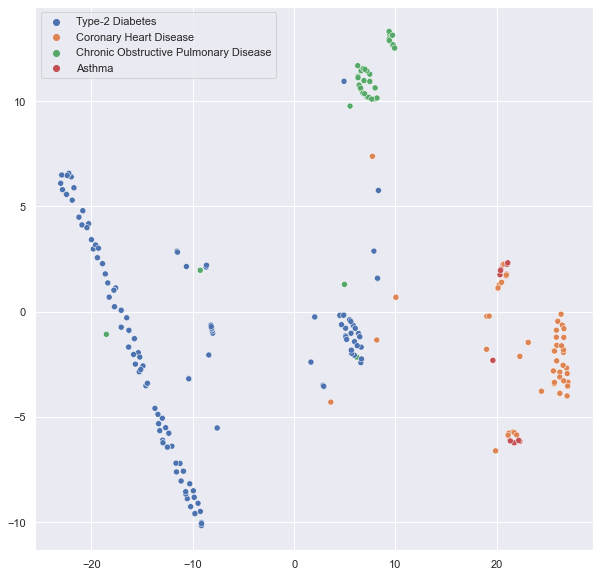

In [173]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate = 50)
tsne_features = m.fit_transform(X_train_selected_features_v1)
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x=tsne_features[:,0] , y=tsne_features[:,1], hue=[list(le_y_train.classes_)[sample_le] for sample_le in y_train_le])
plt.show()

### Model

In [174]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

param_lr = {'penalty': ['l1','l2'], 
            'C': [0.001,0.01,0.1,1,10,100,1000]}

param_rfc = {'criterion': ['gini', 'entropy'], 
             'max_features' : ['auto', 'sqrt'],
             'min_samples_split' : [2, 5, 10, 15], 
             'min_samples_leaf' : [1, 2, 4, 8]}

param_knn = {'n_neighbors':[3,5,7,9,11], 
             'weights':['uniform', 'distance'], 
             'p':[1,2]}

models = [lr, rfc, knn]
params = [param_lr, param_rfc, param_knn]
model_name = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier']
model_accs_od = []

for i in range(len(models)):
    print("Model : ", model_name[i])
   
    model_cv = GridSearchCV(models[i], params[i], cv=10)
    model_cv.fit(X_train_selected_features_v1, y_train_le)
    preds = model_cv.predict(X_test_selected_features_v1)
    acc = accuracy_score(preds, y_test_le)
    model_accs_od.append(acc)
    
    print("Best parameters for the model: ", model_cv.best_params_)
    #print(model_cv.best_score_)
    print("Accuracy score for the best model: ", acc)
    print("------------------------------------------")

Model :  LogisticRegression


c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

Best parameters for the model:  {'C': 100, 'penalty': 'l2'}
Accuracy score for the best model:  0.95
------------------------------------------
Model :  RandomForestClassifier


c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Best parameters for the model:  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15}
Accuracy score for the best model:  0.96
------------------------------------------
Model :  KNeighborsClassifier
Best parameters for the model:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy score for the best model:  0.95
------------------------------------------


### Evaluation

In [175]:
rfc = RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 15)
rfc.fit(X_train_selected_features_v1, y_train_le)
preds = rfc.predict(X_test_selected_features_v1)
print("Accuracy Score: ", accuracy_score(preds, y_test_le))

Accuracy Score:  0.95


#### Confusion Matrix

[Text(0, 0.5, 'Asthma'),
 Text(0, 1.5, 'Chronic Obstructive Pulmonary Disease'),
 Text(0, 2.5, 'Coronary Heart Disease'),
 Text(0, 3.5, 'Type-2 Diabetes')]

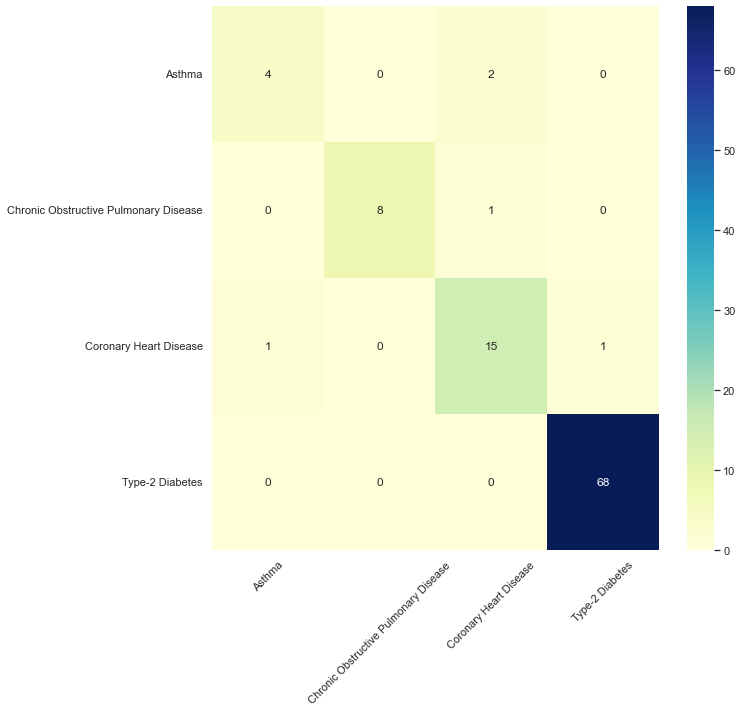

In [176]:
cm = sns.heatmap(confusion_matrix(y_test_le, preds), annot=True, fmt="d", cmap="YlGnBu")
cm.set_xticklabels(le_y_train.classes_, rotation=45)
cm.set_yticklabels(le_y_train.classes_, rotation=0)

#### Classification Report

In [177]:
print(classification_report(y_test_le, preds, target_names=le_y_train.classes_))

                                       precision    recall  f1-score   support

                               Asthma       0.80      0.67      0.73         6
Chronic Obstructive Pulmonary Disease       1.00      0.89      0.94         9
               Coronary Heart Disease       0.83      0.88      0.86        17
                      Type-2 Diabetes       0.99      1.00      0.99        68

                             accuracy                           0.95       100
                            macro avg       0.90      0.86      0.88       100
                         weighted avg       0.95      0.95      0.95       100



### Store the best model, concatenate train & test set and save as csv file

After we test our validated model, we can now concatenate our train and test set. We also store our best classifier, related hyperparameters and selected feature names.

In [178]:
best_classifier = "RandomForestClassifier"
best_classifier_params = "criterion= 'entropy', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 15"
best_model_feature_names = ['SystolicBloodPressure', 'AlcoholUse', 'MostStressed', 'Cholestrol>250', 'HbA1C>6.5', 'SpirometryQualified', 'FeNO>27', 'DoYouSmoke?']

best_model_info = {'best_classifier' : best_classifier, 
                   'best_classifier_params' : best_classifier_params, 
                   'best_model_feature_names' : best_model_feature_names}

In [179]:
X = pd.concat([X_train_backup, X_test_backup], axis=0).sort_index()

In [180]:
y = pd.DataFrame(pd.concat([y_train, y_test], axis=0).sort_index())

In [181]:
X.to_csv('features.csv', index=False)

In [182]:
y.to_csv('target.csv', index=False)

In [183]:
import json
with open("best_model_info.json", "w") as f:
    json.dump(best_model_info, f)

### References

[1] https://learn.datacamp.com/courses/dimensionality-reduction-in-python<br>
[2] https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 <br>
[3] https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5 <br>
[4] https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/ <br>

---